In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#carregando os dados
df=pd.read_csv("data/weatherAUS.csv")
#Exibindo a quantidade de linhas e de colunas que o dataset tem (nesse caso é 145460 linhas e 23 colunas)
print(df.shape)
#olhando as 5 primeiras linhas do dataset
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Usando a função describe que nos da uma visão estatistica geral do dataset e usando o round(2) para as saidas ficarem com 2 casas decimais
df.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [4]:
#Olhando o tipo de dados que cada coluna guarda
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
#Contando a quantidade de valores não preenchidos em cada coluna
print(df.isna().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [6]:
#Olhando a correlação da coluna "Evaporation" em relação a outras colunas
corr_matrix=df.corr()
corr_matrix['Evaporation'].sort_values(ascending=False)

Evaporation      1.000000
MaxTemp          0.587932
Temp3pm          0.572893
Temp9am          0.545115
MinTemp          0.466993
Sunshine         0.365602
WindGustSpeed    0.203021
WindSpeed9am     0.193084
WindSpeed3pm     0.129400
Rainfall        -0.064351
Cloud3pm        -0.182618
Cloud9am        -0.183793
Pressure9am     -0.270362
Pressure3pm     -0.293581
Humidity3pm     -0.390243
Humidity9am     -0.504092
Name: Evaporation, dtype: float64

In [7]:
#Olhando a correlação da coluna "MaxTemp" em relação a outras colunas
corr_matrix=df.corr()
corr_matrix['MaxTemp'].sort_values(ascending=False)

MaxTemp          1.000000
Temp3pm          0.984503
Temp9am          0.887210
MinTemp          0.736555
Evaporation      0.587932
Sunshine         0.470156
WindGustSpeed    0.067615
WindSpeed3pm     0.050300
WindSpeed9am     0.014450
Rainfall        -0.074992
Cloud3pm        -0.277921
Cloud9am        -0.289370
Pressure9am     -0.332061
Pressure3pm     -0.427167
Humidity9am     -0.504110
Humidity3pm     -0.508855
Name: MaxTemp, dtype: float64

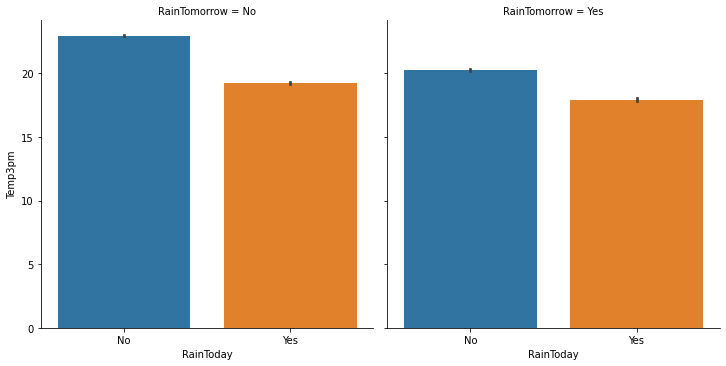

In [8]:
#Fazendo um grafico para analisar se chover hoje tem impacto em chover amanhã
sns.catplot(x="RainToday", y="Temp3pm", col='RainTomorrow', data=df, kind = "bar");

In [9]:
#Retirando as linhas que tem 'MaxTemp', 'Humidity9am' ou 'Evaporation' com valores não preenchidos
df_tmp = df.dropna(subset=['MaxTemp', 'Humidity9am', 'Evaporation'])
print(df_tmp.isna().sum().sort_values(ascending=True))

Date                 0
Location             0
MaxTemp              0
Temp9am              0
Evaporation          0
Humidity9am          0
MinTemp             68
Pressure9am        334
WindSpeed9am       364
Pressure3pm        367
RainToday          390
Rainfall           390
RainTomorrow       733
WindSpeed3pm       788
Temp3pm           1125
WindDir3pm        1142
Humidity3pm       1251
WindDir9am        3411
WindGustSpeed     4838
WindGustDir       4865
Cloud9am          9561
Sunshine         11071
Cloud3pm         12177
dtype: int64


In [10]:
#Separando as variaveis preditoras( "MaxTemp" e "Humidity9am" ) como X
#E a varaivel de resposta ("Evaporation") como targer
x = df_tmp[["MaxTemp", "Humidity9am"]].to_numpy()
target = df_tmp.Evaporation.to_numpy()

In [11]:
#Cria a regressão linear
lr = LinearRegression()

In [12]:
#Treina a regressão linear
lr.fit(x, target)
#Faz a predição com a regressão linear gerada
y = lr.predict(x)

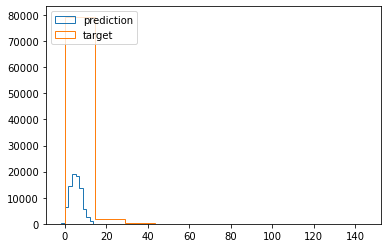

In [13]:
#Exibe o grafico dos resultados
plt.hist(y, histtype='step', label='prediction')
plt.hist(target, histtype='step', label='target')
plt.legend(loc='upper left')

In [14]:
#Avalia o erro do modelo
r2=  mean_squared_error(y, target)
print('R^2 do modelo linear eh {:.3f}'.format(r2))

R^2 do modelo linear eh 10.339


In [15]:
#Exibe os pesos do modelo
print("Wo={} y W1={}".format(lr.coef_,lr.intercept_))

Wo=[ 0.26645297 -0.06223077] y W1=3.265326298568664


In [16]:
#Retirando as linhas que tem 'MaxTemp' ou 'Temp3pm' com valores não preenchidos
df_tmp2 = df.dropna(subset=['MaxTemp', 'Temp3pm'])
print(df_tmp2.isna().sum().sort_values(ascending=True))

Date                 0
Location             0
MaxTemp              0
Temp3pm              0
MinTemp            391
Temp9am            595
WindSpeed3pm       804
Humidity3pm        893
WindSpeed9am      1200
Humidity9am       1456
WindDir3pm        1950
RainTomorrow      2264
RainToday         2361
Rainfall          2361
WindGustSpeed     7975
WindGustDir       8037
WindDir9am        9563
Pressure3pm      12805
Pressure9am      12985
Cloud9am         54398
Cloud3pm         55680
Evaporation      60726
Sunshine         66891
dtype: int64


In [17]:
#Separando a variavel preditora (temp3pm) na variavel x2
x2 = df_tmp2.Temp3pm.to_numpy()
#mudando a forma do array (quando se tem apenas 1 variavel preditora precisa fazer esse reshape para treinar o modelo)
x2 = x2.reshape([-1,1])
#Separando a variavel resposta (MaxTemp) na variavel t2
t2 = df_tmp2.MaxTemp.to_numpy()

In [18]:
#Criando um segundo modelo de regressão linear
lr2 = LinearRegression()

In [19]:
#Treinando o segundo modelo
lr2.fit(x2, t2)
#Fazendo as predições com o novo modelo
y2 = lr2.predict(x2)

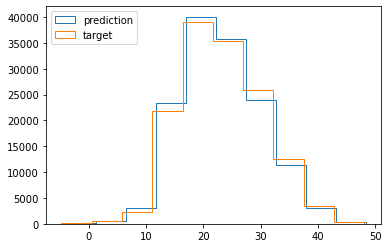

In [20]:
#Criando os graficos
plt.hist(y2, histtype='step', label='prediction')
plt.hist(t2, histtype='step', label='target')
plt.legend(loc='upper left')

In [21]:
#Avaliando o erro do modelo
r2=  mean_squared_error(y2, t2)
print('R^2 do modelo linear eh {:.3f}'.format(r2))

R^2 do modelo linear eh 1.540
